In [24]:
from collections import Counter
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import KMeans
from tqdm import tqdm

In [2]:
from utils import evaluate, load_data

In [3]:
user_item_data, user_meta_data, item_meta_data, test_pairs_data = load_data()

In [17]:
embeddings = np.vstack(item_meta_data["embeddings"].values)

In [19]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")

In [20]:
kmeans.fit_predict(embeddings)

array([2, 7, 7, ..., 8, 4, 4], dtype=int32)

In [23]:
# Initialize lists to store distortion and inertia values
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 100)

# Fit K-means for different values of k
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(embeddings)

    # Calculate distortion as the average squared distance from points to their cluster centers
    distortions.append(
        sum(
            np.min(cdist(embeddings, kmeanModel.cluster_centers_, "euclidean"), axis=1)
            ** 2
        )
        / embeddings.shape[0]
    )

    # Inertia is calculated directly by KMeans
    inertias.append(kmeanModel.inertia_)

    # Store the mappings for easy access
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

100%|██████████| 99/99 [03:56<00:00,  2.39s/it]


Distortion values:
1 : 0.5462631453727335
2 : 0.5158779955085181
3 : 0.49613343623374606
4 : 0.4789255818455594
5 : 0.4659318661965381
6 : 0.4553731996210091
7 : 0.44742900689519666
8 : 0.43970358907338764
9 : 0.43298393932239904
10 : 0.4236933368696227
11 : 0.41713139206828087
12 : 0.41185107174128677
13 : 0.40661758998800956
14 : 0.40213071826100094
15 : 0.3983169336172045
16 : 0.395009583765616
17 : 0.3919753181347785
18 : 0.3879113086140823
19 : 0.3851763729367034
20 : 0.38151628193224324
21 : 0.3789017392504237
22 : 0.37653339820290177
23 : 0.3740653745577877
24 : 0.3716860687571031
25 : 0.36952738466334734
26 : 0.3678500350264283
27 : 0.36595580503742786
28 : 0.36389035229066113
29 : 0.36254407750354
30 : 0.3595055672012156
31 : 0.3573513121823497
32 : 0.3560094565645409
33 : 0.35427579057893616
34 : 0.352456992632192
35 : 0.35092851446614964
36 : 0.3497138140360988
37 : 0.34768994351268573
38 : 0.3463999931733221
39 : 0.3454055810049911
40 : 0.34401285066488424
41 : 0.3431057304

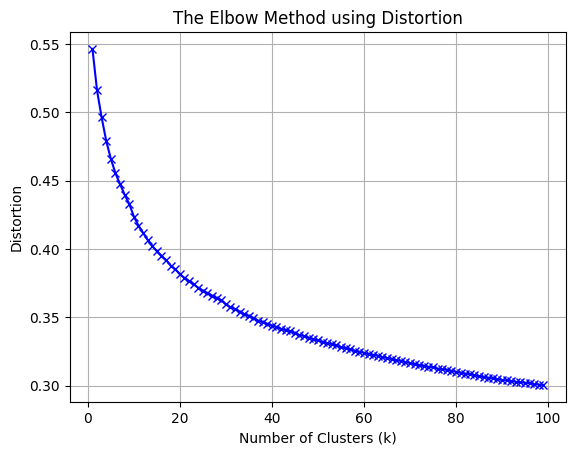

In [25]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f"{key} : {val}")
# Plotting the graph of k versus Distortion
plt.plot(K, distortions, "bx-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion")
plt.title("The Elbow Method using Distortion")
plt.grid()
plt.show()

Inertia values:
1 : 184487.734375
2 : 174225.765625
3 : 167557.796875
4 : 161745.8125
5 : 157357.6875
6 : 153791.765625
7 : 151108.8125
8 : 148499.484375
9 : 146230.234375
10 : 143092.953125
11 : 140876.46875
12 : 139093.265625
13 : 137325.78125
14 : 135810.34375
15 : 134522.328125
16 : 133405.359375
17 : 132380.703125
18 : 131008.140625
19 : 130084.46875
20 : 128848.28125
21 : 127965.3984375
22 : 127165.65625
23 : 126331.703125
24 : 125528.484375
25 : 124799.296875
26 : 124232.828125
27 : 123593.1171875
28 : 122895.4296875
29 : 122440.8828125
30 : 121414.8984375
31 : 120687.171875
32 : 120233.8359375
33 : 119648.4375
34 : 119034.3125
35 : 118518.015625
36 : 118107.859375
37 : 117424.3046875
38 : 116988.640625
39 : 116652.7109375
40 : 116182.3984375
41 : 115876.1015625
42 : 115381.9140625
43 : 115011.0859375
44 : 114817.2890625
45 : 114293.9140625
46 : 113840.4140625
47 : 113594.7265625
48 : 113167.625
49 : 112837.75
50 : 112550.6328125
51 : 112095.4609375
52 : 111837.109375
53 : 11159

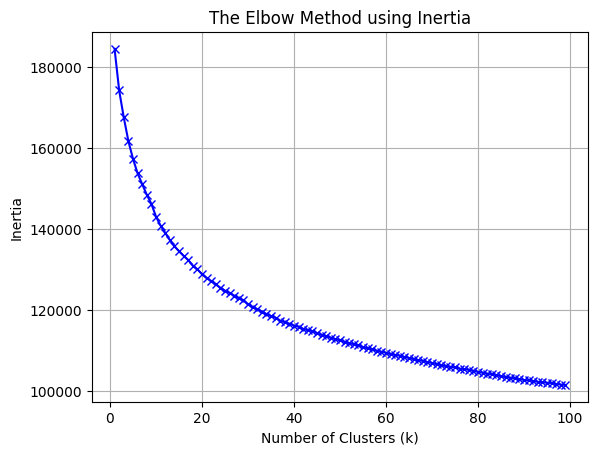

In [26]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()